In [2]:
#This is the file in which I will be attempting to convert the New York Data into a simple polynomial regression model

#Because there exists only one independent variable that we know over time, that being time itself we can only make one sure relationship.
#This relationship will between the indepdent variable time and the dependent variable cases

#How is this data going to be used? See the followng: 

#First I am going to take only one county. Lets say the Bronx
#Then I am going to create a relationship starting at time (henceforth denoted as T) equals 0 to the current day (D).
#So the the tata will go from T0, T1,.....TD. 
#This will require me to convert all of the days to ingter time variables.
#Each day will have a certain number of cases. These cases will then be compared to the presumably stable population of the Bronx
#Although populations change over time (people die, are born, immigrate, etc) this model will be simplified.
#Then, I will create a nice little graph to demonstrate what this model looks like.

In [3]:
#STEP 1: Seeing if I can open this bad boy, simple test performed below with the all data dataFrame object, NYAllData
import pandas as pd

NYAllData = pd.read_csv('New_York_State_Statewide_COVID-19_Testing_20240306.csv')

NYAllData


,Test Date,Geography Description,Geography Level,Total New Positives,Total Cases Per 100k,Total Cases Per 100k (7-day avg),New Positives PCR,Cases Per 100k PCR,New Positives Antigen,Cases Per 100k Antigen
0,03/03/2024,Albany,COUNTY,9,2.85,2.80,8,2.53,1,0.32
1,03/03/2024,Allegany,COUNTY,2,4.28,2.45,1,2.14,1,2.14
2,03/03/2024,Bronx,COUNTY,51,3.70,5.99,26,1.88,25,1.81
3,03/03/2024,Broome,COUNTY,3,1.52,3.19,3,1.52,0,0.00
4,03/03/2024,Cattaraugus,COUNTY,1,1.31,2.43,0,0.00,1,1.31
...,...,...,...,...,...,...,...,...,...,...
106867,03/01/2020,New York City,REGION,2,0.02,0.02,2,0.02,0,0.00
106868,03/01/2020,North Country,REGION,0,0.00,0.00,0,0.00,0,0.00
106869,03/01/2020,Southern Tier,REGION,0,0.00,0.00,0,0.00,0,0.00
106870,03/01/2020,Western New York,REGION,0,0.00,0.00,0,0.00,0,0.00


In [4]:
#Step 3: For each date, we are going to add a new Column, number of days since the start
#To do this we are going to use Python's built in date an time module
#see here for more explanation on that https://www.geeksforgeeks.org/python-program-to-find-number-of-days-between-two-given-dates/
from datetime import datetime as dt

#Finding the start date in the CSV file
startDate = NYAllData.loc[ len(NYAllData)-1 ,'Test Date']
print(startDate)
#stripping the startDate string into a datetime object
startDateObject = dt.strptime(startDate, "%m/%d/%Y")

NYAllData.insert(1, column = "Days Since Start", value = 0)


03/01/2020


In [5]:

#Adding a column to record the days since the start of the virus for each day
emptyReplacementList = []

for index, row in NYAllData.iterrows():
    dateTimeObject= dt.strptime(row['Test Date'], '%m/%d/%Y')
    dateDifference = dateTimeObject - startDateObject
    emptyReplacementList.append(int(dateDifference.days))

print(emptyReplacementList)

    

[1463, 1463, 1463, 1463, 1463, 1463, 1463, 1463, 1463, 1463, 1463, 1463, 1463, 1463, 1463, 1463, 1463, 1463, 1463, 1463, 1463, 1463, 1463, 1463, 1463, 1463, 1463, 1463, 1463, 1463, 1463, 1463, 1463, 1463, 1463, 1463, 1463, 1463, 1463, 1463, 1463, 1463, 1463, 1463, 1463, 1463, 1463, 1463, 1463, 1463, 1463, 1463, 1463, 1463, 1463, 1463, 1463, 1463, 1463, 1463, 1463, 1463, 1463, 1463, 1463, 1463, 1463, 1463, 1463, 1463, 1463, 1463, 1463, 1462, 1462, 1462, 1462, 1462, 1462, 1462, 1462, 1462, 1462, 1462, 1462, 1462, 1462, 1462, 1462, 1462, 1462, 1462, 1462, 1462, 1462, 1462, 1462, 1462, 1462, 1462, 1462, 1462, 1462, 1462, 1462, 1462, 1462, 1462, 1462, 1462, 1462, 1462, 1462, 1462, 1462, 1462, 1462, 1462, 1462, 1462, 1462, 1462, 1462, 1462, 1462, 1462, 1462, 1462, 1462, 1462, 1462, 1462, 1462, 1462, 1462, 1462, 1462, 1462, 1462, 1462, 1462, 1462, 1462, 1462, 1462, 1462, 1461, 1461, 1461, 1461, 1461, 1461, 1461, 1461, 1461, 1461, 1461, 1461, 1461, 1461, 1461, 1461, 1461, 1461, 1461, 1461, 146

In [6]:
NYAllData['Days Since Start'] = emptyReplacementList

In [7]:
#Writitng a csv file that contains only the desired contents, in this case only one county
import csv
with open('bronxData.csv', 'w', newline='') as file:
    csv_writer = csv.writer(file)
    count = 0
    for index, row in NYAllData.iterrows():
        if(count == 0):
            column = ['Test Date','Days Since Start','Geography', 'Description', 'Geography Level','Total New Positives','Total Cases Per 100k','Total Cases Per 100k (7-day avg)','New Positives PCR','Cases Per 100k PCR','New Positives Antigen','Cases Per 100k Antigen']
            csv_writer.writerow(column)
            count+=1
        else:
            if(row['Geography Description'] == 'Bronx'):
                csv_writer.writerow(row)
bronx = pd.read_csv('bronxData.csv')




In [8]:
#Converting bronx data into date time data
bronx['Test Date'] = pd.to_datetime(bronx['Test Date'])
bronx

,Test Date,Days Since Start,Geography,Description,Geography Level,Total New Positives,Total Cases Per 100k,Total Cases Per 100k (7-day avg),New Positives PCR,Cases Per 100k PCR,New Positives Antigen,Cases Per 100k Antigen
0,2024-03-03,1463,Bronx,COUNTY,51,3.70,5.99,26,1.88,25,1.81,NaN
1,2024-03-02,1462,Bronx,COUNTY,43,3.12,6.11,23,1.67,20,1.45,NaN
2,2024-03-01,1461,Bronx,COUNTY,81,5.87,6.16,53,3.84,28,2.03,NaN
3,2024-02-29,1460,Bronx,COUNTY,77,5.58,6.16,49,3.55,28,2.03,NaN
4,2024-02-28,1459,Bronx,COUNTY,92,6.67,6.46,51,3.70,41,2.97,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1459,2020-03-05,4,Bronx,COUNTY,0,0.00,0.01,0,0.00,0,0.00,NaN
1460,2020-03-04,3,Bronx,COUNTY,0,0.00,0.02,0,0.00,0,0.00,NaN
1461,2020-03-03,2,Bronx,COUNTY,0,0.00,0.02,0,0.00,0,0.00,NaN
1462,2020-03-02,1,Bronx,COUNTY,0,0.00,0.03,0,0.00,0,0.00,NaN


In [9]:
#Try splitting up day month year, because it is cyclical
#Use pandas, as opposed to a new CSV


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

import numpy as np
X = bronx['Test Date']

X = bronx[['Test Date']]
y= bronx['Total Cases Per 100k']

Z = PolynomialFeatures(degree = 9, include_bias=False).fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(Z, y, test_size=0.2, shuffle= False, random_state=10)

model = LinearRegression().fit(X_train, y_train)

y_predictionTrain = model.predict(X_train)
print("MAE on train data= " , metrics.mean_absolute_error(y_train, y_predictionTrain))

y_predictionTest = model.predict(X_test)
print("MAE on test data = " , metrics.mean_absolute_error(y_test, y_predictionTest))



MAE on train data=  25.732058889387428
MAE on test data =  41.40368607572445


Shape of X_train: (1171, 9)
Shape of y_train: (1171,)
Shape of y_predictionTrain: (1171,)
Shape of X_test: (293, 9)
Shape of y_test: (293,)
Shape of y_predictionTest: (293,)
X_train: [[1.70942400e+018 2.92213041e+036 4.99515986e+054 ... 4.26529015e+127
  7.29118935e+145 1.24637341e+164]
 [1.70933760e+018 2.92183503e+036 4.99440248e+054 ... 4.26378130e+127
  7.28824170e+145 1.24580656e+164]
 [1.70925120e+018 2.92153966e+036 4.99364518e+054 ... 4.26227292e+127
  7.28529509e+145 1.24523994e+164]
 ...
 [1.60850880e+018 2.58730056e+036 4.16169572e+054 ... 2.78589080e+127
  4.48112986e+145 7.20793682e+163]
 [1.60842240e+018 2.58702262e+036 4.16102513e+054 ... 2.78484347e+127
  4.47920462e+145 7.20445304e+163]
 [1.60833600e+018 2.58674469e+036 4.16035461e+054 ... 2.78379648e+127
  4.47728009e+145 7.20097076e+163]]
y_train: 0        5.99
1        6.11
2        6.16
3        6.16
4        6.46
        ...  
1166    44.87
1167    42.18
1168    41.21
1169    40.17
1170    40.46
Name: Total Cases 

c:\Users\Tyler (School)\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\dates.py:461: RuntimeWarning: invalid value encountered in cast
  d = d.astype('datetime64[us]')


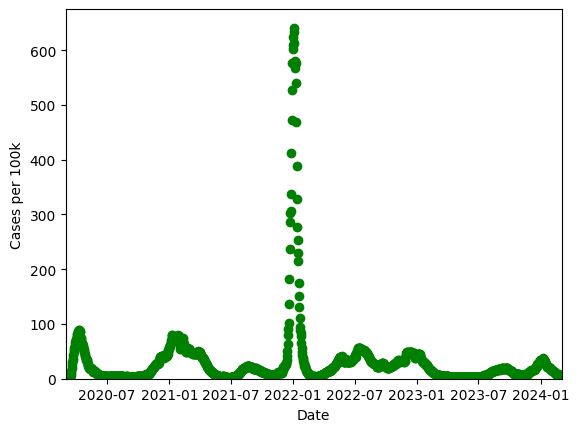

In [10]:
import matplotlib.pyplot as plt
import matplotlib.dates
from datetime import datetime

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_predictionTrain:", y_predictionTrain.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)
print("Shape of y_predictionTest:", y_predictionTest.shape)

# Convert datetime objects to numerical values
X_train_num = matplotlib.dates.date2num(X_train)
X_test_num = matplotlib.dates.date2num(X_test)

print("X_train:", X_train)
print("y_train:", y_train)
print("y_predictionTrain:", y_predictionTrain)
print("X_test:", X_test)
print("y_test:", y_test)
print("y_predictionTest:", y_predictionTest)


#FIX ME: Why is this not plotting?
plt.xlim(datetime(2020,3,1), datetime(2024,3,3))
plt.ylim(0, 675)
plt.scatter(X, y, color = 'green')
plt.plot(X_train_num, y_predictionTrain, color = 'red')
plt.plot(X_test_num, y_predictionTest, color = 'purple')
plt.xlabel("Date")
plt.ylabel("Cases per 100k")
plt.show()

ValueError: x and y must be the same size

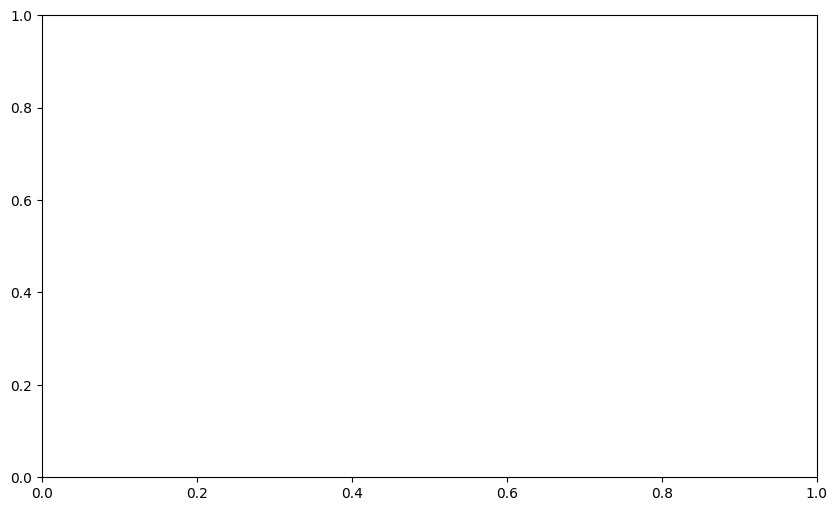

In [11]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Convert datetime objects to numerical values
X_train_num = matplotlib.dates.date2num(X_train)
X_test_num = matplotlib.dates.date2num(X_test)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X_train_num, y_train, color='green', label='Train Data')
plt.scatter(X_test_num, y_test, color='blue', label='Test Data')
plt.plot(X_train_num, y_predictionTrain, color='red', label='Train Prediction')
plt.plot(X_test_num, y_predictionTest, color='purple', label='Test Prediction')
plt.xlabel("Date")
plt.ylabel("Cases per 100k")
plt.title("Cases per 100k Over Time")
plt.legend()
plt.grid(True)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) # Formatting x-axis ticks
plt.gca().xaxis.set_major_locator(mdates.YearLocator()) # Setting major ticks to show every year
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()